In [1]:
import numpy as np

#Create table
from prettytable import PrettyTable

#Read csv
import pandas as pd

#Gegnerate ROC curve graph
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
##Confronto tra final_test_naive_bayes e test_target
##Confronto tra final_test_our_nb e test_target
##Confronto tra target_r e test_target

data_naive = pd.read_csv("./csv/final_test_naive_bayes.csv")
data_our_nb = pd.read_csv("./csv/final_test_our_nb.csv")
data_views_target_r = pd.read_csv("./csv/views_target_r.csv")
data_test_target = pd.read_csv("./csv/test_target.csv")

##Colonne target dei tre file csv  
column_naive = data_naive['target'].values
column_our_nb = data_our_nb['target'].values
column_views_target_r = data_views_target_r['target'].values
column_test_target = data_test_target['target'].values

column_test = []
binary_naive = []
binary_our_nb = []
binary_views_target_r = []
binary_test = []

for i in range(len(column_test_target)):
    column_test.append(column_test_target[i][1:])
    
    if column_naive[i] == "good":
        binary_naive.append(1)
    else:
        binary_naive.append(0)
    
    if column_our_nb[i] == "good":
        binary_our_nb.append(1)
    else:
        binary_our_nb.append(0)

    if column_views_target_r[i] == "good":
        binary_views_target_r.append(1)
    else:
        binary_views_target_r.append(0)

    if column_test_target[i] == "good":
        binary_test.append(1)
    else:
        binary_test.append(0)
    
#print(column_naive)
#print(column_our_nb)
#print(column_views_target_r)
#print(column_test)

In [3]:
##Funzione per generare la matrice di confusione date le colonne target
def create_confusion_matrix(predicted, testing):
    
    true_positive = 0
    false_negative = 0
    false_positive = 0
    true_negative = 0
    i = 0
    
    for i in range(len(predicted)):
        
        if testing[i] == " good" and predicted[i] == "good":
            true_positive += 1
            
        elif testing[i] == " good" and predicted[i] == "bad":
            false_negative += 1
            
        elif testing[i] == " bad" and predicted[i] == "good":
            false_positive += 1
            
        elif testing[i] == " bad" and predicted[i] == "bad":
            true_negative += 1

    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    return true_positive, false_negative, false_positive, true_negative

In [6]:
##Funzione per calcolare accuracy, precision, recall, f-measure, specificity e roc curve 

def performance_unit(confusion_matrix, binary):
    
    true_positive = confusion_matrix[0]
    false_negative = confusion_matrix[1]
    false_positive = confusion_matrix[2]
    true_negative = confusion_matrix[3]
    
    #print(true_positive)
    #print(false_negative)
    #print(false_positive)
    #print(true_negative)
    
    accuracy = (float)(true_positive + true_negative) / (float)(true_positive + false_negative + false_positive + true_negative)
    precision = (float)(true_positive) / (float)(true_positive + false_positive)
    recall = (float)(true_positive) / (float)(true_positive + false_negative)
    fmeasure = (float)(2 * precision * recall) / (float)(precision + recall)
    
    ##VIENE UGUALE ALLA F-MEASURE
    specificity = (float)(true_negative) / (float)(true_negative + false_positive)
    FP_rate = (float)(false_positive) / (float)(true_negative + false_positive)
    
    print("Accuracy = " + str(accuracy))
    print("Precision = " + str(precision))
    print("Recall = " + str(recall))
    print("F-measure = " + str(fmeasure))
    print("Specificity = " + str(specificity))
    
    print_roc_curve()
    

In [ ]:
##Funzione per grafico ROC-curve ed AUC

def print_roc_curve()
    '''
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(binary_test, binary)
        roc_auc[i] = auc(fpr[i], tpr[i])

    ##Print roc_auc_score(binary_test, binary)
    plt.figure()
    plt.plot(fpr[1], tpr[1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.show()
    print("\n")

    x = false_positive # false_positive_rate
    y = true_positive # true_positive_rate 

    # This is the ROC curve
    plt.plot(binary_test,binary)
    plt.show() 

    # This is the AUC
    auc = np.trapz(binary,binary_test)
    '''
    
    thresholds = np.arange(0.0, 1.01, .01)
    # false positive rate
    fpr = []
    # true positive rate
    tpr = []
    TP = 0
    FP = 0
    
    P = sum(binary_test)
    N = len(binary_test) - P
    
    '''
        for i in range(len(score)):
            if (score[i] > thresh):
                if y[i] == 1:
                    TP = TP + 1
                if y[i] == 0:
                    FP = FP + 1
        fpr.append(FP/float(N))
        tpr.append(TP/float(P))
    '''
    for thresh in thresholds:
        for i in range(len(binary)):

            if binary_test[i] == "1" and binary[i] == "1":
                TP += 1
                tpr.append(TP/float(P))

            if binary_test[i] == "0" and binary[i] == "1":
                FP += 1
                fpr.append(FP/float(N))


    plt.scatter(fpr, tpr)
    plt.show()

Accuracy = 0.919214744721
Precision = 0.958960610435
Recall = 0.925741588692
F-measure = 0.94205834684
Specificity = 0.903280680437


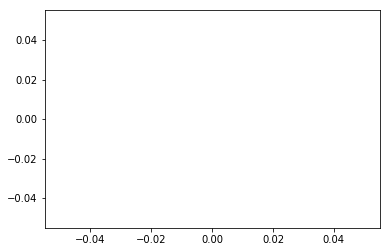

Accuracy = 0.901631240732
Precision = 0.944792844659
Recall = 0.914791956998
F-measure = 0.929550397006
Specificity = 0.8695018226


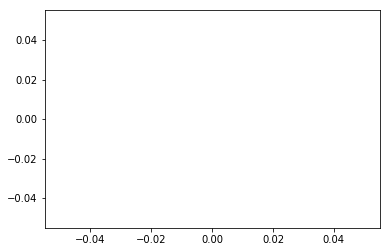

Accuracy = 0.915118988772
Precision = 0.937561844449
Recall = 0.943161457296
F-measure = 0.940353314807
Specificity = 0.846658566221


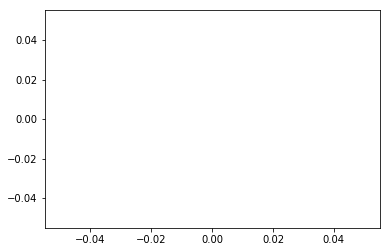

In [7]:

cm_naive = create_confusion_matrix(column_naive, column_test_target)
cm_our_nb = create_confusion_matrix(column_our_nb, column_test_target)
cm_views_target_r = create_confusion_matrix(column_views_target_r, column_test_target)

performance_unit(cm_naive, binary_naive)
performance_unit(cm_our_nb, binary_our_nb)
performance_unit(cm_views_target_r, binary_views_target_r)
